# _Bike Sharing Assignment_

## _Importing the important libraries_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## _Reading the data file_

In [2]:
bike_1=pd.read_csv(r'D:\Upgrad Feb 2022\Bike Sharing Assginment\day.csv')

In [3]:
bike_1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Looking at the shape of dataframe:
bike_1.shape

(730, 16)

In [5]:
# checking the null values & datatype:

bike_1.info()

# There are no null values found.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Looking at the Numeric variables:

bike_1.describe()

# The data has 11 numeric columns.

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Looking at the columns all together.

bike_1.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
# Checking the size of the data

bike_1.size

11680

In [9]:
# Checking the data types:

bike_1.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### _Dropping Some of the Columns in the dataframe_

In [10]:
# Here, we can Drop 'instant' column as it is just the index column & its not useful

bike_1.drop(['instant'], axis = 1, inplace = True)

In [11]:
# Also, we can drop Casual & registered columns as it has nothing to do with our target variable.

bike_1.drop(['casual'], axis = 1, inplace = True)
bike_1.drop(['registered'], axis = 1, inplace = True)

In [12]:
# Dropping 'dteday' column because we have 'month' and 'weekday' columns.

bike_1.drop(['dteday'], axis = 1, inplace = True)

In [13]:
# Now Checking the data again.

bike_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# Checking the info again:

bike_1.info()

# Now we have left 12 columns to analysis the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [15]:
# Convert to 'category' data type

bike_1['season']=bike_1['season'].astype('category')
bike_1['weathersit']=bike_1['weathersit'].astype('category')
bike_1['mnth']=bike_1['mnth'].astype('category')
bike_1['weekday']=bike_1['weekday'].astype('category')

In [16]:
bike_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


### _Creating Dummy Variables_

In [17]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_2 = pd.get_dummies(bike_1, drop_first=True)
bike_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [18]:
bike_2.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
bike_2.shape

(730, 30)

### _SPLITTING THE DATA_

In [20]:
# We will now split the data into TRAIN and TEST (70:30 ratio)

In [21]:
bike_train,bike_test=train_test_split(bike_2,train_size=0.7,test_size = 0.30,random_state=100)
print(bike_train.shape)
print(bike_test.shape)


(510, 30)
(219, 30)


### _Visualising data the numeric data_

In [22]:
bike_num = bike_train[['temp', 'atemp','hum','windspeed','cnt']]

<Figure size 720x576 with 0 Axes>

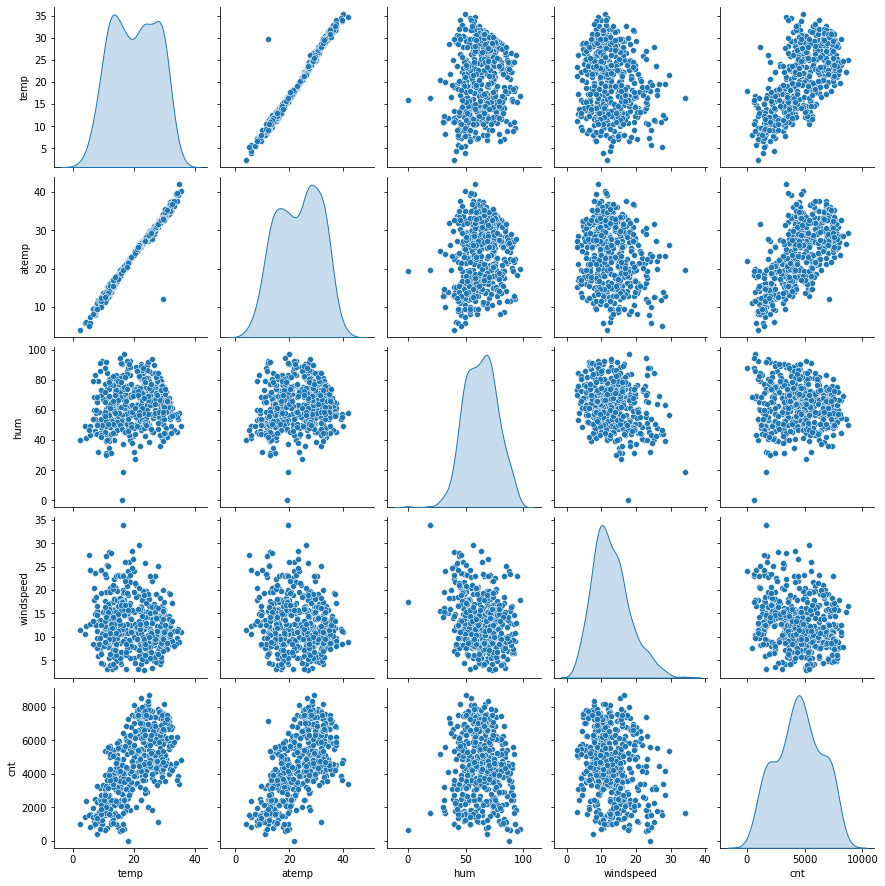

In [23]:
plt.figure(figsize=(10,8))
sns.pairplot(bike_num, diag_kind='kde')
plt.show()

#### _This Pair-Plot shows that there is a Linear Relationship between 'temp','atemp' and 'cnt'_

## _Visualising Catagorical Variables_

In [24]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null   

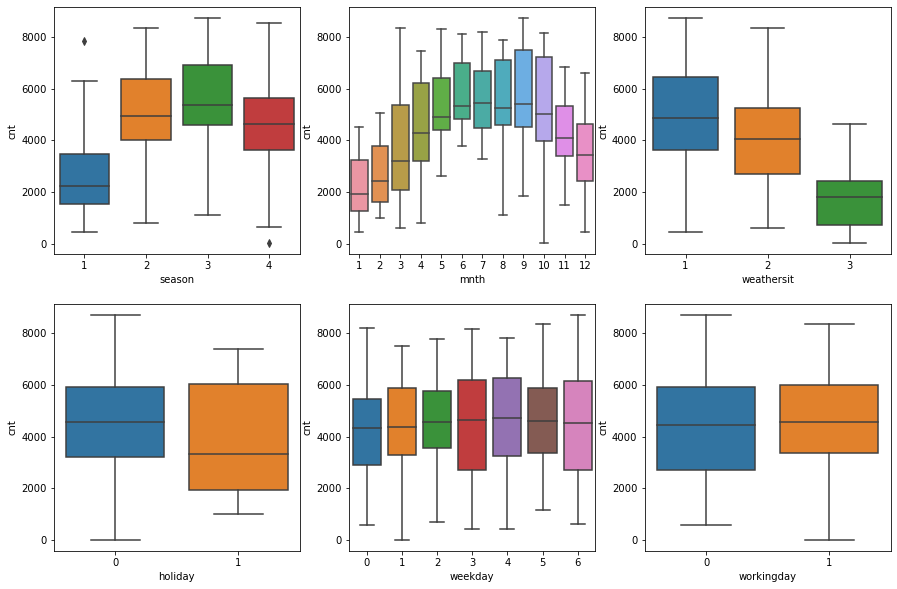

In [25]:
# Build boxplot of all categorical variables for the target variable 'cnt' 

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_1)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_1)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_1)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_1)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_1)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_1)
plt.show()

### Observation:
We have 6 categorical variables in the dataset.

The inference that We could derive were:

### 1. Season:
Most of the bike booking are being done in season 3. Other season 2 & season 4 are also good booking period.

### 2. mnth:
Lot of bookings are happening month from 5 to 9 months. mnth has positive trend for 'cnt' and can be a good predictor for the dependent variable.

### 3. weathersit: 
Here we can see that most of the booking the company is getting is from weathersit_1 & weathersit_2. The bookings in weather_3 is lowest. This indicates that weather is a good indicator of bike bookings.

### 4. Holidays:
Here holidays doesn't have much effect on bike bookings.

#### Weakday doen't show too much variation, whereas, workingday has some trend with the bookings.


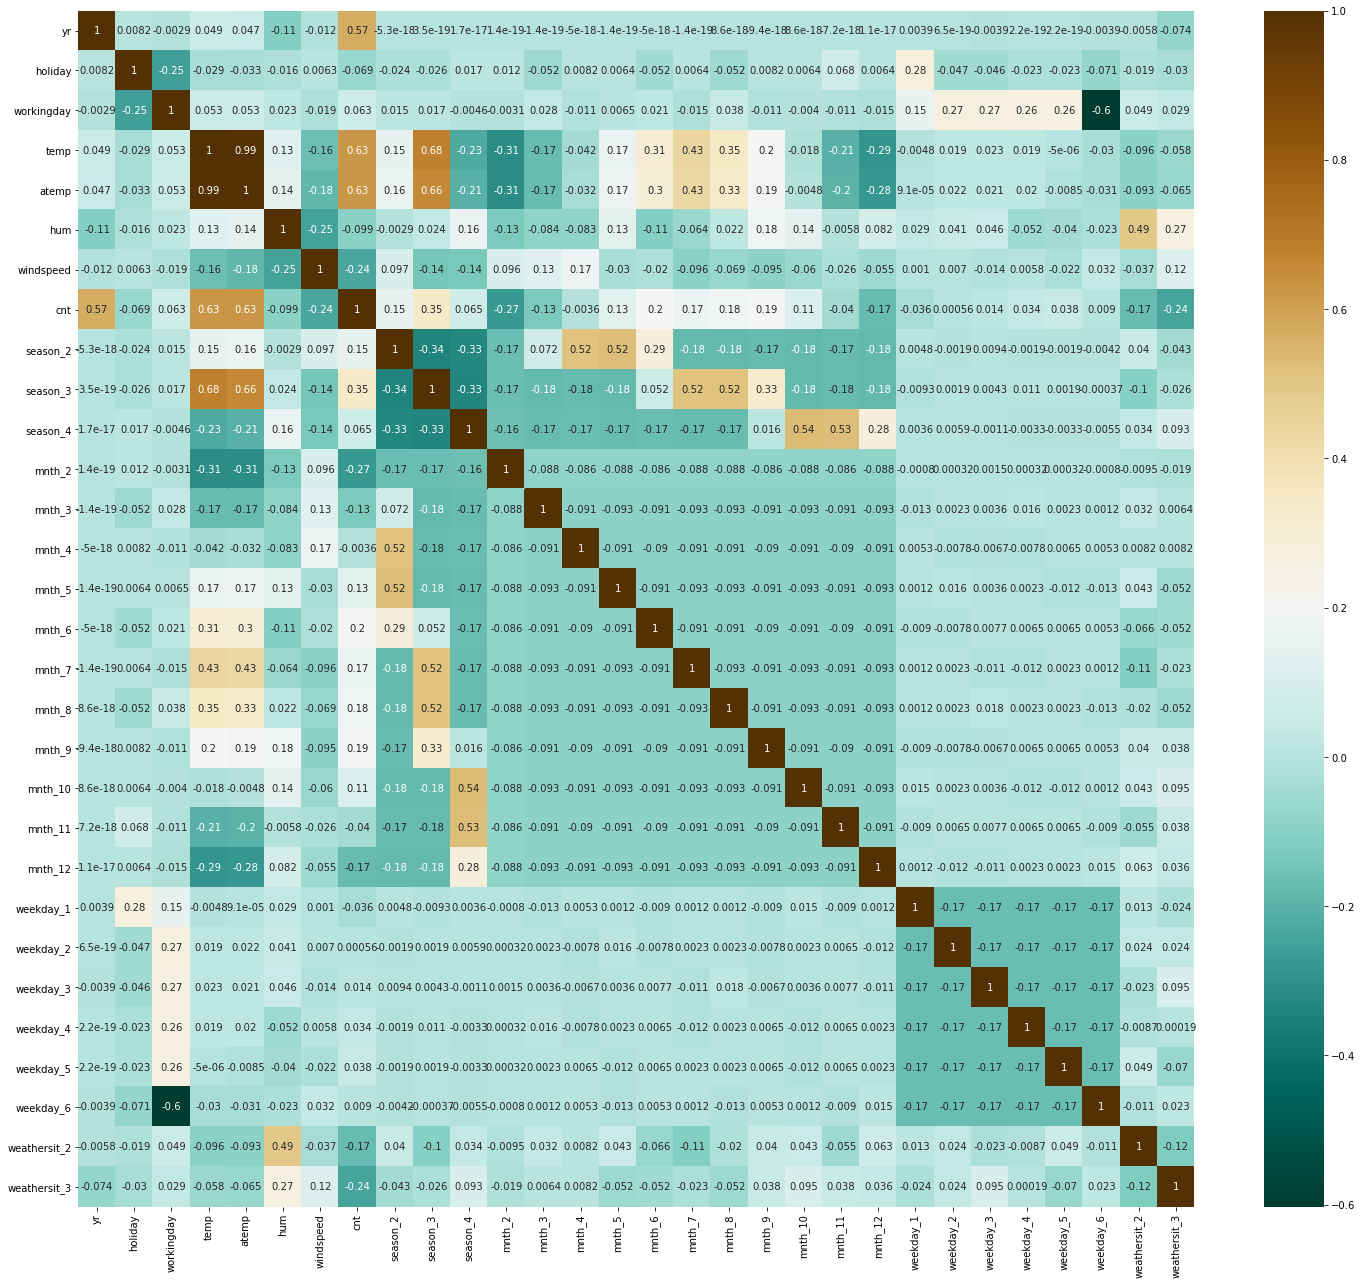

In [26]:
# checking the correlation coefficients to analyze variables that are highly correlated.

plt.figure(figsize = (25,22))
sns.heatmap(bike_2.corr(), annot = True, cmap="BrBG_r")
plt.show()


# This shows that are multicollinear, and some variable have high collinearity with the target variable.

### _Resaclling the Variables:_ 

In [27]:
scaler = MinMaxScaler()

In [28]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0


In [29]:
bike_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [30]:
# Apply scaler to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [31]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


In [32]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### _Training the Linear Model_

In [33]:
# For training now we don't need target variable "cnt", so removing 'cnt'

y_train = bike_train.pop("cnt")
X_train = bike_train

In [34]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [35]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [36]:
# Running RFE with the output number of the variable equal to 20

lm = LinearRegression()

lm.fit(X_train, y_train)


LinearRegression()

In [37]:
# RFE

rfe = RFE(lm, 20)  
rfe = rfe.fit(X_train, y_train)    

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 2),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 3),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 4),
 ('mnth_12', False, 5),
 ('weekday_1', False, 6),
 ('weekday_2', False, 7),
 ('weekday_3', False, 9),
 ('weekday_4', False, 10),
 ('weekday_5', False, 8),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [40]:
X_train.columns[~rfe.support_]

Index(['mnth_2', 'mnth_7', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

In [41]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

### _Linear Model_1_

In [42]:
# Checking VIF

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif    

,Features,VIF
3,temp,411.62
4,atemp,376.14
5,hum,18.24
8,season_3,9.10
7,season_2,7.45
2,workingday,5.09
6,windspeed,4.33
12,mnth_5,3.75
11,mnth_4,3.35
9,season_4,3.25


In [43]:
# Add a constant

X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model

lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [44]:
# Check the parameters obtained

lr1.params

const           0.190525
yr              0.231015
holiday        -0.049048
workingday      0.043572
temp            0.433872
atemp           0.032216
hum            -0.159190
windspeed      -0.182584
season_2        0.087103
season_3        0.048869
season_4        0.157400
mnth_3          0.047215
mnth_4          0.043968
mnth_5          0.067881
mnth_6          0.039030
mnth_8          0.056942
mnth_9          0.124031
mnth_10         0.048706
weekday_6       0.053372
weathersit_2   -0.059842
weathersit_3   -0.253315
dtype: float64

In [45]:
# Print a summary of the linear regression model obtained


print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.5
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.51e-188
Time:                        01:23:35   Log-Likelihood:                 525.37
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -919.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1905      0.029      6.556   

### _Linear Model_2_

As we can see that 'atemp' has high p-value and high VIF

In [46]:
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)

In [47]:
# Checking VIF Again:

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.24
4,hum,17.98
7,season_3,9.03
6,season_2,7.45
2,workingday,5.09
5,windspeed,4.13
11,mnth_5,3.75
10,mnth_4,3.34
8,season_4,3.24
12,mnth_6,2.45


In [48]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Check the parameters obtained

lr2.params

# Print a summary of the linear regression model obtained

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.75e-189
Time:                        01:23:35   Log-Likelihood:                 525.34
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1908      0.029      6.576   

### _Linear Model_3_

Now we will Remove 'hum' because it has Very High 'VIF' value.

Also, temperature can be important for a business. So, we can't drop 'temp' even if it has high VIF.

In [49]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [50]:
# Checking VIF again.

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,20.90
6,season_3,8.63
5,season_2,7.44
2,workingday,4.53
4,windspeed,3.98
10,mnth_5,3.74
9,mnth_4,3.33
7,season_4,3.14
11,mnth_6,2.41
0,yr,2.07


In [51]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Check the parameters obtained

lr3.params

# Print a summary of the linear regression model obtained

print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.3
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.78e-186
Time:                        01:23:36   Log-Likelihood:                 516.25
No. Observations:                 510   AIC:                            -994.5
Df Residuals:                     491   BIC:                            -914.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0988      0.019      5.078   

### _Linear Model_4_

Now we will drop Season_3 as it has very high VIF.

In [52]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,8.09
5,season_2,6.19
2,workingday,4.49
4,windspeed,3.86
9,mnth_5,3.64
8,mnth_4,3.33
10,mnth_6,2.38
6,season_4,2.14
0,yr,2.04
11,mnth_8,1.83


In [54]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Check the parameters obtained

lr4.params

# Print a summary of the linear regression model obtained

print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     156.8
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.44e-186
Time:                        01:23:36   Log-Likelihood:                 512.64
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     492   BIC:                            -913.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0903      0.019      4.678   

### _Linear Model_5_

Now we will drop holiday as it has very high VIF.

In [55]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)

In [56]:
# Checking VIF again.

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.91
4,season_2,6.19
1,workingday,4.16
3,windspeed,3.76
8,mnth_5,3.63
7,mnth_4,3.33
9,mnth_6,2.37
5,season_4,2.12
0,yr,2.04
10,mnth_8,1.82


In [57]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Check the parameters obtained

lr5.params

# Print a summary of the linear regression model obtained

print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.6
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.84e-186
Time:                        01:23:37   Log-Likelihood:                 510.88
No. Observations:                 510   AIC:                            -987.8
Df Residuals:                     493   BIC:                            -915.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0819      0.019      4.355   

### _Linear Model_6_

Now we will drop mnth_6 as it has very high VIF and high p-value as well

In [58]:
X_train_new = X_train_new.drop(["mnth_6"], axis = 1)

In [59]:
# Checking VIF again.

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.53
1,workingday,4.16
4,season_2,4.12
3,windspeed,3.76
7,mnth_4,2.25
8,mnth_5,2.25
5,season_4,2.05
0,yr,2.04
12,weekday_6,1.72
9,mnth_8,1.62


In [60]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Check the parameters obtained

lr6.params

# Print a summary of the linear regression model obtained

print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Wed, 11 May 2022   Prob (F-statistic):          8.82e-187
Time:                        01:23:37   Log-Likelihood:                 508.94
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     494   BIC:                            -918.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0792      0.019      4.212   

### _Linear Model_7_

Now we will drop mnth_3,mnth_4,mnth_5, mnth_8 & mnth_10 as it has very high VIF and high p-value as well

In [61]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)
X_train_new = X_train_new.drop(["mnth_4"], axis = 1)
X_train_new = X_train_new.drop(["mnth_5"], axis = 1)
X_train_new = X_train_new.drop(["mnth_8"], axis = 1)
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [62]:
# Checking VIF again.

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,weekday_6,1.69
4,season_2,1.57
8,weathersit_2,1.53
5,season_4,1.40
6,mnth_9,1.20
9,weathersit_3,1.08


In [63]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

# Check the parameters obtained

lr7.params

# Print a summary of the linear regression model obtained

print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.47e-188
Time:                        01:23:37   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0753      0.019      4.051   

## Final Model Predictions

#### Linear Model_7 coefficient values:

###	_Features   -   Coeff._


* const           __ 0.0753     
* yr              __ 0.2331
* workingday      __ 0.0563
* temp            __ 0.5499
* windspeed       __-0.1552
* season_2        __ 0.0874
* season_4        __ 0.1318
* mnth_9          __ 0.0972
* weekday_6       __ 0.0677
* weathersit_2    __-0.0813
* weathersit_3    __-0.2880

### F Statistics


* F-statistic: 254.0
* Prob (F-statistic):  1.47e-188
* The F-Statistics value of 254 (which is greater than 1) and the p-value of '0.0000' states that the overall model is $'significant'$

### The Final Model equation according to Linear Model_7:

$'cnt' = 0.0753 + (yr × 0.2331) + (workingday × 0.0563) + (temp × 0.5499) − (windspeed × 0.1552) + (season2 × 0.0874) + (season4 ×0.1318) + (mnth9 × 0.0972) + (weekday6 ×0.0677) − (weathersit2 × 0.0813) − (weathersit3 × 0.2880)$

### Interpretation of Coefficients:
* $temp$:   A coefficient value of ‘0.5499’ indicated that there is a '$Positive$' influence of temp variable on the bike Rental

* $weathersit$_3:  A coefficient value of ‘-0.0813’ indicated that there is a $Negative$ influence of weathersit variable on the bike Rental

* $yr$: A coefficient value of ‘0.2331’ indicated that there is a $Positive$ influence of 'yr' variable on the bike Rental

* $season$_4: A coefficient value of ‘0.1318’ indicated that there is a $Positive$ influence of 'yr' variable on the bike Rental

* $windspeed$: A coefficient value of ‘-0.1552’ indicated that there is a $Negative$ influence of 'windspeed' variable on the bike Rental

* $season$_2: A coefficient value of ‘ 0.0874’ indicated that there is a $Positive$ influence of 'Season_2' variable on the bike Rental

* $mnth$_9: A coefficient value of ‘0.0972’ indicated that there is a $Positive$ influence of 'mnth_9' variable on the bike Rental

* $weekday$_6: A coefficient value of ‘0.0677’ indicated that there is a $Positive$ influence of 'Weekdays' variable on the bike Rental

* $weathersit$_2: A coefficient value of ‘-0.0813’ indicated that there is a $Negative$ influence of 'weathersit_2' variable on the bike Rental



## Residual Analysis:
* Error terms are normally distributed with mean zero 

In [64]:
# Residual Analysis Of Training Data

y_train_pred = lr7.predict(X_train_lm7)

<Figure size 720x576 with 0 Axes>

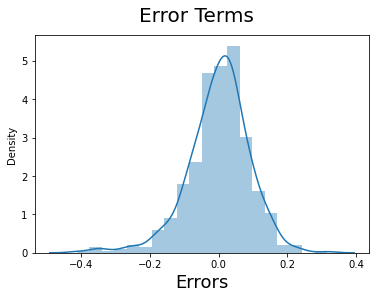

In [65]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
plt.figure(figsize=(10,8))
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()


# we could see that the Residuals are normally distributed. Hence our Linear Regression model is valid.

## _MAKING PREDICTION_

#### Applying the scaling on the test sets

In [66]:
# Now Applying scaling to all numeric variables in test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [67]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [68]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test¶

In [69]:
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [70]:
#Selecting the variables of final model.

col1=X_train_new.columns
X_test=X_test[col1]

In [71]:
# Adding constant variable to test dataframe

X_test_lm7 = sm.add_constant(X_test)
X_test_lm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weekday_6     219 non-null    uint8  
 9   weathersit_2  219 non-null    uint8  
 10  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [72]:
# Making predictions using the final model

y_pred = lr7.predict(X_test_lm7)

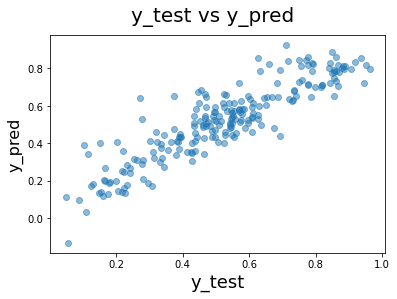

In [73]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)           
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### R-Square Value for test

In [74]:
r2_score(y_test, y_pred)

# We have a R-squared value of 83.5 % on train data and 79.5% on test data.

0.7955844377237248

In [75]:
# R-Squared Value
r2 = 0.7955844377237248

In [76]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7857567664604423

#### We have a Mean Squared Error close to 0 on the training dataset, meaning our model is able to correctly predict all variances in the data.
#### On the test validation dataset, MSE is 0.01 also close to zero, meaning our model is able perform similarly on unknown data sets too.

In [77]:
print(mean_squared_error(y_true=y_train, y_pred=y_train_pred))
print(mean_squared_error(y_true=y_test, y_pred=y_pred))

0.008267466546147666
0.009708882328806267


### Final Result Comparison

* Train R^2 : 0.836
* Train Adjusted R^2 :0.832
* Test R^2 :0.795
* Test Adjusted R^2 :0.785
* This seems to be a really good model that can very well 'Generalize' various datasets.

## FINAL VERDICT

##### We have the final model predictions as follow:

* Temperature (temp) - Temperature is a positive indicator of bike rental, as the temp cofficient is ‘0.5499’ a unit increase in temp variable increases the bike rental numbers by  0.5499 units.


* Weather Situation 3 (weathersit_3) - Weather Situation 3 is a negative indicator of bike rental, as the weather situation  cofficient is '-0.2880' ‘’ a unit increase in weather situation 3 variable decreases the bike rental numbers by 0.2880 units.


* Year (yr) - Year is a positive indicator of bike rental, as the temp cofficient is ‘0.2331’ a unit increase in year variable increases the bike rental numbers by 0.2331 units.

#### So, the model here suggests following variables to be considered important while planning, to achive maximum Booking¶

* season_4: - season_4 is a positive indicator of bike rental as compared to season 1, as the temp cofficient is ‘0.1318’ a unit increase in season_4 variable increases the bike rental numbers by 0.1318 units



* windspeed: - windspeed is a Negative indicator of bike rental, as the temp cofficient is ‘-0.1552’ a unit increase in windspeed variable decreases the bike rental numbers by 0.1552 units